# Ficha 2

### Trabalho realizado por:
Duarte Castanheira  nº111211 <br>
Rafael Custódio     nº111112

Neste trabalho o objetivo é programar algoritmos que, dados exemplos da entrada e saída desejadas, aprendam a imitar o comportamento presente nos dados

## Exercicio 1
Neste primeiro exercicio será implementada uma rede neuronal simples com duas entradas e uma saída com base nas seguintes equações: <br>
o = f(s), <br>
s = w0 + w1 · x1 + w2 · x2 <br>
f(s) = {1 se s > 0.5, 0 se s <= 0.5}

<b>Pontos 1 a 5:</b> <br>
Para começar, escolhemos usar o operador lógico <b>OR</b> para o nosso vetor logico e foram inicializados os valores w0, w1 e w2 que são fundamentais para a rede neuronal.
Também foi calculado o erro final (ao fim de n épocas), ou seja, o numero de bits errados à saida da rede.

In [115]:
import numpy as np
import random
import matplotlib.pyplot as plt



#vetor de entradas
vetor = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])


vetor_d = np.logical_or(vetor[:, 0], vetor[:, 1])   # OU lógico
#vetor = np.logical_and(vetor[:, 0], vetor[:, 1])       # E lógico
vetor_d = vetor_d.astype(int)
#print(vetor_d)

#inicializa pesos aleatórios
w0 = random.uniform(-1, 1)
w1 = random.uniform(-1, 1)
w2 = random.uniform(-1, 1)

# taxa de aprendizagem e número de épocas
alpha = 1e-2
epocas = 100
# listas para guardar históricos
erro_total_hist = []
w0_hist = []
w1_hist = []
w2_hist = []

for epoch in range(epocas):
    # cálculo do resultado
    result = w0 + w1 * vetor[:, 0] + w2 * vetor[:, 1]

    # calculo da saída
    o = (result > 0.5).astype(int)
    #print(o)
    
    # cálculo do erro
    erro = vetor_d - o
    erro_total = np.sum(np.abs(erro))

    erro_total_hist.append(np.sum(np.abs(erro)))

    # inicializar incrementos (Δw)
    delta_w0 = 0
    delta_w1 = 0
    delta_w2 = 0

    # calcular os incrementos
    for i in range(len(vetor)):
        e = erro[i]
        x1, x2 = vetor[i]
        delta_w0 += alpha * e
        delta_w1 += alpha * x1 * e
        delta_w2 += alpha * x2 * e

    # atualizar os pesos
    w0 += delta_w0
    w1 += delta_w1
    w2 += delta_w2

    # guardar históricos dos pesos
    w0_hist.append(w0)
    w1_hist.append(w1)
    w2_hist.append(w2)

    print(f"Δw0 = {delta_w0:.6f}, Δw1 = {delta_w1:.6f}, Δw2 = {delta_w2:.6f}")

    # se o erro total for 0, acabou o treino
    if erro_total == 0:
        break


print(f"erro final: {erro_total_hist[-1]}")

Δw0 = 0.030000, Δw1 = 0.020000, Δw2 = 0.020000
Δw0 = 0.030000, Δw1 = 0.020000, Δw2 = 0.020000
Δw0 = 0.030000, Δw1 = 0.020000, Δw2 = 0.020000
Δw0 = 0.030000, Δw1 = 0.020000, Δw2 = 0.020000
Δw0 = 0.030000, Δw1 = 0.020000, Δw2 = 0.020000
Δw0 = 0.030000, Δw1 = 0.020000, Δw2 = 0.020000
Δw0 = 0.030000, Δw1 = 0.020000, Δw2 = 0.020000
Δw0 = 0.030000, Δw1 = 0.020000, Δw2 = 0.020000
Δw0 = 0.030000, Δw1 = 0.020000, Δw2 = 0.020000
Δw0 = 0.030000, Δw1 = 0.020000, Δw2 = 0.020000
Δw0 = 0.030000, Δw1 = 0.020000, Δw2 = 0.020000
Δw0 = 0.030000, Δw1 = 0.020000, Δw2 = 0.020000
Δw0 = 0.030000, Δw1 = 0.020000, Δw2 = 0.020000
Δw0 = 0.030000, Δw1 = 0.020000, Δw2 = 0.020000
Δw0 = 0.030000, Δw1 = 0.020000, Δw2 = 0.020000
Δw0 = 0.030000, Δw1 = 0.020000, Δw2 = 0.020000
Δw0 = 0.030000, Δw1 = 0.020000, Δw2 = 0.020000
Δw0 = 0.030000, Δw1 = 0.020000, Δw2 = 0.020000
Δw0 = 0.030000, Δw1 = 0.020000, Δw2 = 0.020000
Δw0 = 0.030000, Δw1 = 0.020000, Δw2 = 0.020000
Δw0 = 0.030000, Δw1 = 0.020000, Δw2 = 0.020000
Δw0 = 0.02000

<b>Ponto 6:</b><br>
Neste ponto, são atualizados wo, w1 e w2 no código acima de acordo com a equação seguinte:   wi = wi + ∆wi<br>
Desta forma, o erro vai diminuindo a cada época.


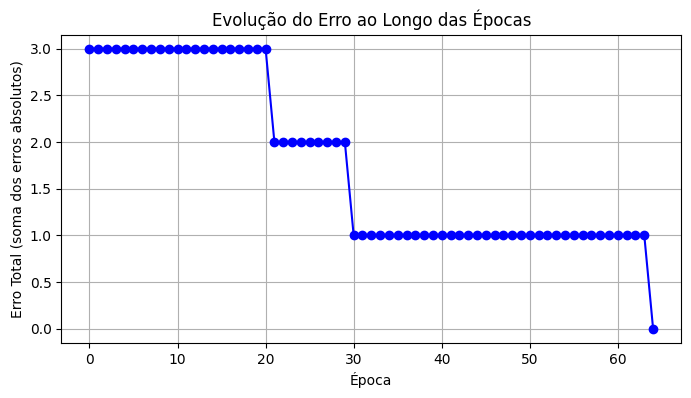


 Todos classificados correctamente na época 64


In [116]:
plt.figure(figsize=(8,4))
plt.plot(erro_total_hist, marker='o', linestyle='-', color='blue')
plt.title("Evolução do Erro ao Longo das Épocas")
plt.xlabel("Época")
plt.ylabel("Erro Total (soma dos erros absolutos)")
plt.grid(True)
plt.show()
if erro_total != 0:
    print(f"\n Não foi possível classificar todos correctamente em {epocas} épocas.")
else:
    print(f"\n Todos classificados correctamente na época {epoch}")

<b>a)</b> Como é possivel ver pelo gráfico o numero de erros vai diminuindo ao longo das épocas até chegar a zero erros ou, em certos casos, apenas um erro.

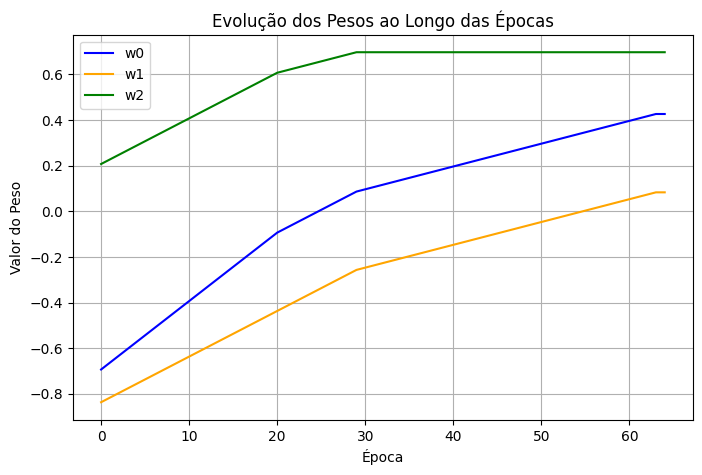

In [117]:
plt.figure(figsize=(8,5))

plt.plot(w0_hist, label='w0', color='blue')
plt.plot(w1_hist, label='w1', color='orange')
plt.plot(w2_hist, label='w2', color='green')

plt.title("Evolução dos Pesos ao Longo das Épocas")
plt.xlabel("Época")
plt.ylabel("Valor do Peso")
plt.grid(True)
plt.legend()
plt.show()

<b>b)</b> Como é possivel ver pelo gráfico, os valores de cada peso vão convergindo após cada atualização (época). Ao correr varias vezes o codigo é possivel ver que estes tendem sempre a convergir à excepção de certos casos (casos onde não existam erros logo na primeira época por exemplo).<br>
<b>c)</b> Ao alterar o parametro alpha, quer a evolução dos pesos, quer a diminuiçao dos erros se altera. ao diminuir alpha, estes valores sofrem pequenas alterações fazendo com que o numero de erros raramente se altere. Em sentido contrario, ao aumentar alpha, os valores dos pesos alteram-se mais abruptamente fazendo o numero de erros diminuir mais rápidamente. Apesar disso, um alpha muito grande pode prejudicar a aprendizagem e a rede neuronal. Após vários testes o melhor alpha encontrado foi alpha= 10e-2.<br>
<b>d)</b> Neste caso, demorou um certo numero de épocas mas, dependendo dos valores iniciais, o numero de épocas necessárias para o erro ser nulo vai ser diferente. Para isso, o código seguinte representa 30 tentativas para nos permitir estimar melhor o numero de épocas necessárias até que todo o conjunto seja bem classificado.

In [118]:
n_exp = 30 #numero de tentativas
epocas_converg = [] #para guardar o número de épocas total de cada exp

for exp in range(n_exp):
    # inicializar pesos aleatórios
    w0 = random.uniform(-1, 1)
    w1 = random.uniform(-1, 1)
    w2 = random.uniform(-1, 1)

    convergiu = False  # flag para saber se convergiu

    for epoch in range(epocas):
        # cálculo do resultado
        result = w0 + w1 * vetor[:, 0] + w2 * vetor[:, 1]

        # cálculo da saída
        o = (result > 0.5).astype(int)
        
        # cálculo do erro
        erro = vetor_d - o
        erro_total = np.sum(np.abs(erro))

        # verifica se já convergiu (erro total = 0)
        if erro_total == 0:
            epocas_converg.append(epoch + 1)
            convergiu = True
            break  # sai do ciclo, já acertou tudo

        # calcular os incrementos
        delta_w0 = alpha * np.sum(erro)
        delta_w1 = alpha * np.sum(vetor[:, 0] * erro)
        delta_w2 = alpha * np.sum(vetor[:, 1] * erro)

        # atualizar pesos
        w0 += delta_w0
        w1 += delta_w1
        w2 += delta_w2

    # se não convergiu dentro do número máximo de épocas, regista o máximo
    if not convergiu:
        epocas_converg.append(epocas)

# calcular estatísticas
media_epocas = np.mean(epocas_converg)
desvio_padrao = np.std(epocas_converg)

print(f"Média de épocas até à convergência: {media_epocas:.2f}")
print(f"Desvio-padrão: {desvio_padrao:.2f}")



Média de épocas até à convergência: 45.77
Desvio-padrão: 29.12


<b>d) (continuação)</b> para uma taxa de aprendizagem de alpha = 1e-2, podemos concluir que o numero médio de épocas necessárias para o conjunto ser bem classificado é de aproximadamente 50 épocas, apesar do desvio padrão ser elevado, o que significa que este valor varia muito.

<b>Ponto 7</b><br>
Neste ponto, geramos um conjunto de 1000 pontos, divididos em dois conjuntos de 500 pontos (cada um com um label diferente) da mesma forma que foi feito na ficha 1 

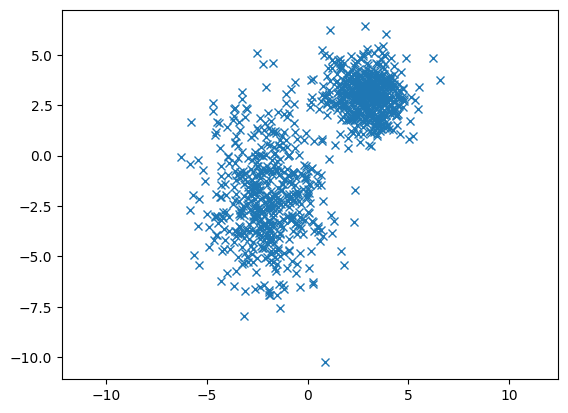

In [119]:

# primeiro conjunto de pontos
mean = [3, 3]    
cov = [[1, 0], [0, 1]] 
size = 500                 
a = np.random.multivariate_normal(mean, cov, size).T
labels_a = np.ones((1, size))  # label = 1

# segundo conjunto de pontos
mean = [-2, -2]
cov = [[2, 0], [0, 5]]    
b = np.random.multivariate_normal(mean, cov, size).T
labels_b = np.full((1, size), 2)  # label = 2

# junta coordenadas dos dois conjuntos e respetivas labels
a = np.concatenate((a, labels_a), axis=0)
b = np.concatenate((b, labels_b), axis=0)
c = np.concatenate((a, b), axis=1)

c = c.T
np.random.shuffle(c)
c = c.T

x = c[0]
y = c[1]
labels = c[2]

# gráfico dos pontos com cores diferentes
plt.plot(x, y,'x')
plt.axis('equal')
plt.show()

#conjunto de pontos guardados num ficheiro de texto
data = c.T
np.savetxt("conjunto.txt", data, fmt="%.5f %.5f %d",
           header="x y label", comments='')

<b>Ponto 8</b> <br>
Sendo o conjunto anterior o conjunto de treino, usamos esse mesmo oconjunto para distinguir pontos gerados por uma e outra distribuição

In [120]:
epocas = 100
labels_bin = np.where(labels == 1, 1, 0)
x = np.array(x)
y = np.array(y)
for epoch in range(epocas):
    # cálculo do resultado
    result = w0 + w1 * x + w2 * y

    # calculo da saída
    o = np.where(result >= 0, 1, 0)    # cálculo do erro
    erro = labels_bin - o

    # inicializar incrementos (Δw)
    delta_w0 = 0
    delta_w1 = 0
    delta_w2 = 0

    # calcular os incrementos
    for i in range(len(x)):
        e = erro[i]
        x1, x2 = x[i], y[i]
        delta_w0 += alpha * e
        delta_w1 += alpha * x1 * e
        delta_w2 += alpha * x2 * e
        print(f'Ponto ({x[i]:.2f}, {y[i]:.2f}) - Predicted: {o[i]}, Actual Label: {int(labels[i])}')

    # atualizar os pesos
    w0 += delta_w0
    w1 += delta_w1
    w2 += delta_w2
    


Ponto (3.63, 1.35) - Predicted: 1, Actual Label: 1
Ponto (3.12, 2.99) - Predicted: 1, Actual Label: 1
Ponto (2.92, 2.44) - Predicted: 1, Actual Label: 1
Ponto (2.85, 3.64) - Predicted: 1, Actual Label: 1
Ponto (-1.72, -3.95) - Predicted: 0, Actual Label: 2
Ponto (-2.95, -1.77) - Predicted: 0, Actual Label: 2
Ponto (-0.41, -2.78) - Predicted: 0, Actual Label: 2
Ponto (-1.78, -0.89) - Predicted: 0, Actual Label: 2
Ponto (3.18, 4.11) - Predicted: 1, Actual Label: 1
Ponto (3.58, 4.56) - Predicted: 1, Actual Label: 1
Ponto (2.85, 2.55) - Predicted: 1, Actual Label: 1
Ponto (1.69, 4.39) - Predicted: 1, Actual Label: 1
Ponto (-3.45, -5.03) - Predicted: 0, Actual Label: 2
Ponto (-0.82, -3.19) - Predicted: 0, Actual Label: 2
Ponto (1.66, -4.75) - Predicted: 0, Actual Label: 2
Ponto (-2.88, -1.92) - Predicted: 0, Actual Label: 2
Ponto (2.40, 3.96) - Predicted: 1, Actual Label: 1
Ponto (-1.53, -5.39) - Predicted: 0, Actual Label: 2
Ponto (2.24, 3.28) - Predicted: 1, Actual Label: 1
Ponto (2.51, 1

Ponto (3.43, 2.97) - Predicted: 1, Actual Label: 1
Ponto (1.81, 2.38) - Predicted: 1, Actual Label: 1
Ponto (1.73, 1.92) - Predicted: 1, Actual Label: 1
Ponto (3.18, 2.58) - Predicted: 1, Actual Label: 1
Ponto (-1.43, -4.10) - Predicted: 0, Actual Label: 2
Ponto (0.71, 0.83) - Predicted: 1, Actual Label: 1
Ponto (-1.88, -2.62) - Predicted: 0, Actual Label: 2
Ponto (-2.63, -1.57) - Predicted: 0, Actual Label: 2
Ponto (4.05, 2.80) - Predicted: 1, Actual Label: 1
Ponto (1.22, 4.74) - Predicted: 1, Actual Label: 1
Ponto (-2.78, -4.89) - Predicted: 0, Actual Label: 2
Ponto (-0.00, -2.79) - Predicted: 0, Actual Label: 2
Ponto (5.13, 2.93) - Predicted: 1, Actual Label: 1
Ponto (-2.88, -2.70) - Predicted: 0, Actual Label: 2
Ponto (-1.95, -3.93) - Predicted: 0, Actual Label: 2
Ponto (1.82, -5.41) - Predicted: 0, Actual Label: 2
Ponto (3.29, 5.09) - Predicted: 1, Actual Label: 1
Ponto (3.74, 2.82) - Predicted: 1, Actual Label: 1
Ponto (3.74, 3.23) - Predicted: 1, Actual Label: 1
Ponto (-3.17, -7

Com os resultados anteriores é possivel ver como ficou o resultado final. Para isso imprimimos com cores diferentes os vários conjuntos criados: <br>
- Pontos gerados pela primeira distribuição e classificados com 1 pelo perceptrão (vermelho)
- Pontos gerados pela primeira distribuição e classificados com 0 pelo perceptrão a (roxo)
- Pontos gerados pela segunda distribuição e classificados com 1 pelo perceptrão a (verde)
- Pontos gerados pela segunda distribuição e classificados com 0 pelo perceptrão a (azul)

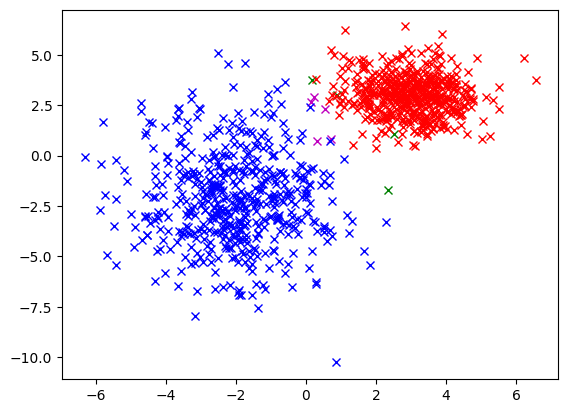

In [121]:
#visualizar os Pontos gerados com cores diferentes
for i in range(len(x)):
    result = w0 + w1 * x[i] + w2 * y[i]
    o = 1 if result > 0.5 else 0
    if labels[i] == 1 and o == 1:
        plt.plot(x[i], y[i], 'rx')  # vermelho
    elif labels[i] == 1 and o == 0:
        plt.plot(x[i], y[i], 'mx')  # roxo
    elif labels[i] == 2 and o == 1:
        plt.plot(x[i], y[i], 'gx')  # verde
    else:
        plt.plot(x[i], y[i], 'bx')  # azul

Através do gráfico anterior, é possivel concluir que o algoritmo consegue distinguir relativamente bem os pontos de um e outro conjunto. Apesar disso, se os conjuntos estiverem muito sobrepostos, o algoritmo pode não conseguir distinguir os pontos. Isso é possivel ver através dos pontos a roxo e verde no gráfico.

<b>Ponto 9</b><br>
Neste ponto fazemos uma matriz de confusão colorida para melhor perceber os resultados do algoritmo.<br>
Também calculamos as métricas para um teste apenas


True Positives: 495, False Negatives: 5, False Positives: 4, True Negatives: 496


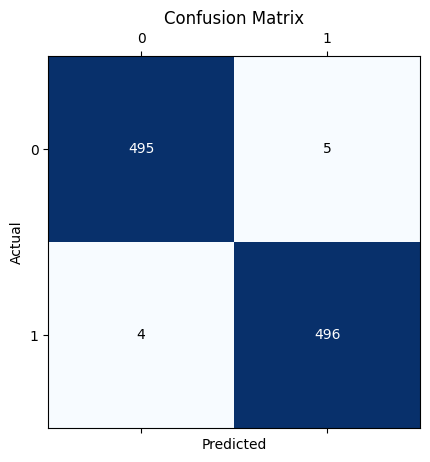

Accuracy: 0.991, Precision: 0.992, Recall: 0.990, F1 Score: 0.991


In [122]:
#matriz de confusão
tp = tn = fp = fn = 0
for i in range(len(x)):
    result = w0 + w1 * x[i] + w2 * y[i]
    o = 1 if result > 0.5 else 0
    if labels[i] == 1 and o == 1:
        tp += 1
    elif labels[i] == 1 and o == 0:
        fn += 1
    elif labels[i] == 2 and o == 1:
        fp += 1
    else:
        tn += 1
print(f'True Positives: {tp}, False Negatives: {fn}, False Positives: {fp}, True Negatives: {tn}')

# matriz de confusão colorida
confusion_matrix = np.array([[tp, fn],
                             [fp, tn]])

plt.matshow(confusion_matrix, cmap=plt.cm.Blues)
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center', color='white' if confusion_matrix[i, j] > confusion_matrix.max()/2 else 'black')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#metricas de avaliação
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
print(f'Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1_score:.3f}')

A partir desta matriz, e comparando com o gráfico anterior, é possivel ver que os resultados são os mesmos, sendo que os casos de False negatives correspondem aos pontos roxos do gráfico e os casos de false positives aos pontos verdes.

<b>Ponto 10</b><br>
Neste ultimo ponto, vamos fazer 30 testes para ter uma melhor visão sobre as métricas do algoritmo anterior. Para isso, os valores iniciais w0, w1 e w2 serão inicialiados aleatoriamente em cada teste para ter uma melhor visão sobre a eficacia do algoritmo.

In [106]:
tentativas = 30

# vetores das metricas de cada tentativa
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

for tentativa in range(tentativas):
    #inicializa pesos aleatórios
    w0 = random.uniform(-1, 1)
    w1 = random.uniform(-1, 1)
    w2 = random.uniform(-1, 1)

    for epoch in range(epocas):
    # cálculo do resultado
        result = w0 + w1 * x + w2 * y

        # calculo da saída
        o = np.where(result >= 0, 1, 0)    # cálculo do erro
        erro = labels_bin - o

        # inicializar incrementos (Δw)
        delta_w0 = 0
        delta_w1 = 0
        delta_w2 = 0

        # calcular os incrementos
        for i in range(len(x)):
            e = erro[i]
            x1, x2 = x[i], y[i]
            delta_w0 += alpha * e
            delta_w1 += alpha * x1 * e
            delta_w2 += alpha * x2 * e

        # atualizar os pesos
        w0 += delta_w0
        w1 += delta_w1
        w2 += delta_w2

        tp = tn = fp = fn = 0
        for i in range(len(x)):
            result = w0 + w1 * x[i] + w2 * y[i]
            o = 1 if result > 0.5 else 0

            o = 1 if result > 0.5 else 0
            if labels[i] == 1 and o == 1:
                tp += 1
            elif labels[i] == 1 and o == 0:
                fn += 1
            elif labels[i] == 2 and o == 1:
                fp += 1
            else:
                tn += 1

    #metricas de avaliação
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)

#media e desvio padrão das metricas
print(f'Accuracy: {np.mean(accuracy_list):.2f} ± {np.std(accuracy_list):.2f}')
print(f'Precision: {np.mean(precision_list):.2f} ± {np.std(precision_list):.2f}')
print(f'Recall: {np.mean(recall_list):.2f} ± {np.std(recall_list):.2f}')
print(f'F1 Score: {np.mean(f1_score_list):.2f} ± {np.std(f1_score_list):.2f}')


Accuracy: 0.98 ± 0.03
Precision: 0.99 ± 0.01
Recall: 0.98 ± 0.06
F1 Score: 0.98 ± 0.03


Com estes resultados, podemos concluir que o algoritmo tem métricas muito elevadas, ou seja, muito boas para um algoritmo de Aprendizagem Supervisionada. Tambem é possivvel ver que o desvio padrão não se altera muito o que significa que este algoritmo é estavel.

## Exercicio 2


Para este exercicio vamos implementar um classificador k-NN para classificar um conjunto. Esse conjunto tem de ser importado através do seguinte código:

In [76]:

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features.to_numpy()
Y = iris.data.targets.to_numpy()
  
# metadata 
#print(iris.metadata) 
  
# variable information 
print(iris.variables) 

           name     role         type demographic  \
0  sepal length  Feature   Continuous        None   
1   sepal width  Feature   Continuous        None   
2  petal length  Feature   Continuous        None   
3   petal width  Feature   Continuous        None   
4         class   Target  Categorical        None   

                                         description units missing_values  
0                                               None    cm             no  
1                                               None    cm             no  
2                                               None    cm             no  
3                                               None    cm             no  
4  class of iris plant: Iris Setosa, Iris Versico...  None             no  


<b>Ponto 1</b><br>
Com este conjunto é necessario dividir entre conjunto de de treino (70%) e o conjunto de teste (30%)<br>
Após essa divisão, o conjunto de treino é treinado para  valores de k de 3,7 e 11.
Para melhores resultados é necessario fazer 30 testes para cada valor de k.

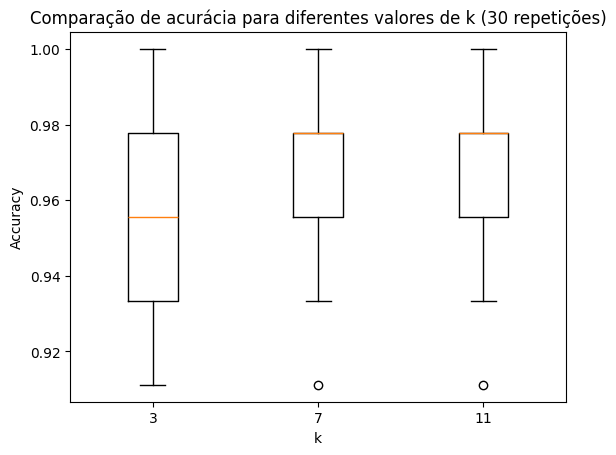

In [77]:

#dividir o dataset em treino e teste (70/30)
np.random.seed(42)  # para reprodutibilidade
indices = np.arange(len(X))
np.random.shuffle(indices)
Y = Y.flatten()
split = int(0.7 * len(X))
train_idx, test_idx = indices[:split], indices[split:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = Y[train_idx], Y[test_idx]

#funcao da distancia euclideana
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def majority_vote(labels):
    counts = {}
    for label in labels:
        counts[label] = counts.get(label, 0) + 1
    return max(counts, key=counts.get)

#funcao do k-nn
def knn_nearest_neighbors(X_train, y_train, X_test, k=3):
    y_pred = []
    for x3 in X_test:
        distances = [euclidean_distance(x3, x_train) for x_train in X_train]
        k_indices = np.argsort(distances)[:k]
        # converter cada label para valor simples
        k_nearest_labels = [y_train[i].item() if isinstance(y_train[i], np.ndarray) else y_train[i] for i in k_indices]
        pred_label = majority_vote(k_nearest_labels)
        y_pred.append(pred_label)
    return np.array(y_pred)

#parametros
k_values = [3, 7, 11]
n_repeats = 30
accuracy_results = {k: [] for k in k_values}
conf_matrices = {}

for k in k_values:
    for repeat in range(n_repeats):
        np.random.seed(repeat)  # diferente seed para cada repetição
        indices = np.arange(len(X))
        np.random.shuffle(indices)  # diferentes elementos no conjunto treino e teste

        split = int(0.7 * len(X))
        train_idx, test_idx = indices[:split], indices[split:]

        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]

        y_pred = knn_nearest_neighbors(X_train, y_train, X_test, k=k)
        accuracy = np.sum(y_pred == y_test) / len(y_test)
        accuracy_results[k].append(accuracy)

        # guardar a matriz de confusão do primeiro teste de cada k
        if repeat == n_repeats - 1:
            classes = np.unique(Y)
            conf_matrix = np.zeros((len(classes), len(classes)), dtype=int)
            for true, pred in zip(y_test, y_pred):
                i = np.where(classes == true)[0][0]
                j = np.where(classes == pred)[0][0]
                conf_matrix[i, j] += 1
            conf_matrices[k] = conf_matrix

# boxplot para comparação de k
plt.boxplot([accuracy_results[k] for k in k_values], tick_labels=k_values)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Comparação de acurácia para diferentes valores de k (30 repetições)')
plt.show()

Através do gráfico de boxplot podemos concluir que todos os valores de k têm uma accuracy muito alta apsear de, quando k=3, a dispersão ser maior, ou seja, os resultados variam mais a cada teste. Para k=7 e k=11 os resultados são mais consistentes. assim, podemos concluir que o algoritmo é mais estável para um k mais alto uma vez que, quando o k é baixo, este está mais sensivel ao ruido.

<b>Ponto 2</b><br>
Para uma melhor compreensão dos resultados, podemos fazer as matrizes de confusã para um teste de cada valor de k. Neste caso usamos o ultimo teste.

Matriz de confusão para k=3 (ultimo teste):
[[17  0  0]
 [ 0 16  0]
 [ 0  1 11]]

Matriz de confusão para k=7 (ultimo teste):
[[17  0  0]
 [ 0 16  0]
 [ 0  1 11]]

Matriz de confusão para k=11 (ultimo teste):
[[17  0  0]
 [ 0 15  1]
 [ 0  1 11]]



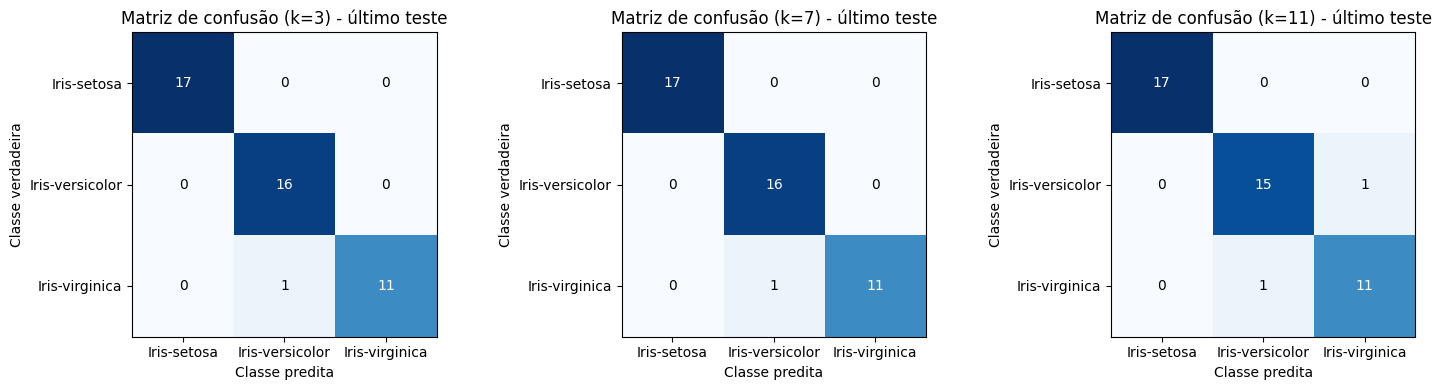

In [78]:
# imprimir matrizes de confusão representativas
for k in k_values:
    print(f"Matriz de confusão para k={k} (ultimo teste):")
    print(conf_matrices[k])
    print()

# cria figura com 3 subplots lado a lado
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, k in zip(axes, k_values):
    im = ax.imshow(conf_matrices[k], interpolation='nearest', cmap='Blues')
    ax.set_title(f"Matriz de confusão (k={k}) - último teste")
    ax.set_xlabel('Classe predita')
    ax.set_ylabel('Classe verdadeira')
    ax.set_xticks(range(len(classes)))
    ax.set_yticks(range(len(classes)))
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    for i in range(conf_matrices[k].shape[0]):
        for j in range(conf_matrices[k].shape[1]):
            ax.text(j, i, str(conf_matrices[k][i, j]),
                    ha='center', va='center', color='white' if conf_matrices[k][i, j] > conf_matrices[k].max()/2 else 'black')

plt.tight_layout()
plt.show()

Com as matrizes de confusão é possivel concluir que os 3 valores de k classificam bem este conjunto.<br>
<br>
<b>Ponto 3:</b> O valor de k deve ser impar para, quando o algoritmo for decidir a classe de um dado, não existirem empates entre classes. no conjunto de pontos do exercicio 1 apenas existem duas classes o que faria com que, se o k fosse par, o algoritmo não conseguisse classificar o conjunto corretamente.

## Exercicio 3
Usando o conjunto de dados do exercicio anterior, vamos agora implemente um classificador Naive Bayes.<br>
Para isso, no código seguinte discretizamos todos os valores nas colunas em categorias com três valores possíveis (low / medium / high).<br>
O conjunto de treino e de teste também têm uma partição de 70% / 30%.

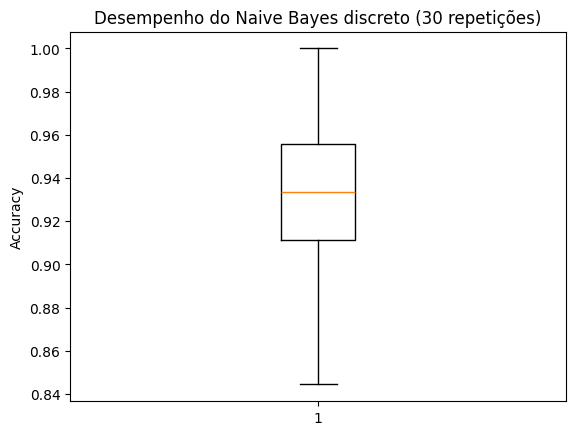

Matriz de confusão (último teste):
[[17  0  0]
 [ 0 15  1]
 [ 0  1 11]]


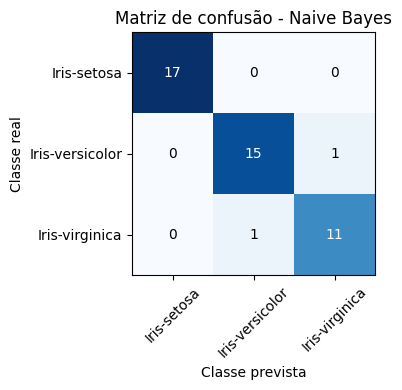

In [79]:
#discretização dos dados
def discretize(X):
    X_disc = []
    for i in range(X.shape[0]):
        row = []
        for col in range(X.shape[1]):
            low = np.quantile(X[:, col], 1/3)
            high = np.quantile(X[:, col], 2/3)
            if X[i, col] <= low:
                row.append('low')
            elif X[i, col] <= high:
                row.append('medium')
            else:
                row.append('high')
        X_disc.append(row)
    return X_disc  # lista de listas

X_disc = discretize(X)

# treino Naive Bayes
def naive_bayes_train(X_train, y_train):
    classes = np.unique(y_train)
    n_features = len(X_train[0])

    priors = {c: np.sum(y_train == c)/len(y_train) for c in classes}
    cond_probs = {}

    for c in classes:
        cond_probs[c] = {}
        # selecionar linhas com a classe c
        X_c = [X_train[i] for i in range(len(X_train)) if y_train[i] == c]
        for f in range(n_features):
            vals = [row[f] for row in X_c]
            unique, counts = np.unique(vals, return_counts=True)
            total = len(X_c)
            cond_probs[c][f] = {val: count/total for val, count in zip(unique, counts)}
    return priors, cond_probs

# previsão
def naive_bayes_predict(X_test, priors, cond_probs):
    y_pred = []
    classes = list(priors.keys())
    for x in X_test:
        probs = {}
        for c in classes:
            prob = priors[c]
            # produto das probabilidades condicionais
            for f in range(len(x)):
                prob *= cond_probs[c][f].get(x[f], 1e-6)
            probs[c] = prob
        y_pred.append(max(probs, key=probs.get))
    return np.array(y_pred)

n_repeats = 30
accuracy_results = []

# repetir o processo 30 vezes
for repeat in range(n_repeats):
    np.random.seed(repeat)
    indices = np.arange(len(X_disc))
    np.random.shuffle(indices)

    # dividir o dataset
    split = int(0.7 * len(X_disc))
    train_idx, test_idx = indices[:split], indices[split:]
    
    X_train = [X_disc[i] for i in train_idx]
    X_test = [X_disc[i] for i in test_idx]
    y_train = Y[train_idx]
    y_test = Y[test_idx]
    
    # treino e previsão
    priors, cond_probs = naive_bayes_train(X_train, y_train)
    y_pred = naive_bayes_predict(X_test, priors, cond_probs)
    accuracy = np.sum(y_pred == y_test)/len(y_test)
    accuracy_results.append(accuracy)

# boxplot
plt.boxplot(accuracy_results)
plt.ylabel('Accuracy')
plt.title('Desempenho do Naive Bayes discreto (30 repetições)')
plt.show()

# matriz de confusão do último teste
classes = np.unique(Y)
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

conf_matrix = np.zeros((len(classes), len(classes)), dtype=int)
for true, pred in zip(y_test, y_pred):
    i = np.where(classes == true)[0][0]
    j = np.where(classes == pred)[0][0]
    conf_matrix[i, j] += 1

print("Matriz de confusão (último teste):")
print(conf_matrix)

plt.figure(figsize=(5, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de confusão - Naive Bayes')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Classe prevista')
plt.ylabel('Classe real')

# adiciona os números dentro das células
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]),
                 ha='center', va='center',
                 color='white' if conf_matrix[i, j] > conf_matrix.max()/2 else 'black')

plt.tight_layout()
plt.show()


Com esta matriz de confusão é possivel concluir que este algoritmo classifica muito bem este conjunto apesar de não ter uma accuracy de 100%

<b>Ponto 2:</b><br>
Uma das diferenças entre estes dois algoritmos é o tempo de execução, onde este algoritmo é mais rápido que o K-NN o que pode ser benéfico para conjuntos maiores. Em termos de precisão e accuracy, o algoritmo K-NN é melhor do que o Nayve Bayes pois tem melhores métricas para o mesmo conjunto. Isto acontece porque o Nayve Bayes é um algoritmo baseado em probabilidades, comparando todos os valores da probabilidade de um dado pertencer a uma dada classe, o que pode nem sempre ser o mais correto.

## Exercicio 4

Para este exercicio será feita a classificação através da entropia e do ganho de informação. Estes valores ajudam a saber qua a caracteristica que melhor classifica os dados.<br>
Será usado o mesmo conjunto que nos exercicios anteriores.

Neste excerto de codigo é calculada a entropia total, e dos 3 subconjuntos(low, medium e high) para as 4 caracteristicas possiveis do cojunto.<br>
A classe alvo será a classe "Iris-setosa".

In [80]:
# Classe alvo (Iris-setosa como p+ e o resto como p−)
Y_binary = np.where(Y == 'Iris-setosa', 'positive', 'negative')

# Função para calcular entropia
def entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probs = counts / len(labels)
    return -np.sum(probs * np.log2(probs))

# Calcular entropia do conjunto completo
entropy_total = entropy(Y_binary)
print(f"Entropia total: {entropy_total}")

# Para cada feature, fazer a partição e calcular ganho
feature_names = iris.data.features.columns

for i, feature_name in enumerate(feature_names):
    print(f"=== Feature: {feature_name} ===")

    # Selecionar a coluna da feature
    feature_col = X[:, i]
    q1, q2 = np.quantile(feature_col, [1/3, 2/3])

    # Função para rotular low/medium/high
    def label_level(value):
        if value <= q1:
            return 'low'
        elif value <= q2:
            return 'medium'
        else:
            return 'high'

    levels = np.array([label_level(v) for v in feature_col])

    # Criar subconjuntos
    low_idx = levels == 'low'
    medium_idx = levels == 'medium'
    high_idx = levels == 'high'

    subsets = {
        'Low': Y_binary[low_idx],
        'Medium': Y_binary[medium_idx],
        'High': Y_binary[high_idx]
    }

    # Calcular entropias dos subconjuntos
    print("Entropias dos subconjuntos:")
    for name, subset in subsets.items():
        ent = entropy(subset)
        print(f"Entropia de {name}: {ent}")

    # Calcular ganho da partição
    gain = entropy_total - sum(
        (len(sub) / len(Y_binary)) * entropy(sub) for sub in subsets.values()
    )

    print(f"Ganho da partição: {gain:.4f}\n")

Entropia total: 0.9182958340544896
=== Feature: sepal length ===
Entropias dos subconjuntos:
Entropia de Low: 0.5699613760403499
Entropia de Medium: 0.43408112000433474
Entropia de High: -0.0
Ganho da partição: 0.5587

=== Feature: sepal width ===
Entropias dos subconjuntos:
Entropia de Low: 0.2192973081321754
Entropia de Medium: 0.8974271930876951
Entropia de High: 0.7918583525674836
Ganho da partição: 0.3081

=== Feature: petal length ===
Entropias dos subconjuntos:
Entropia de Low: -0.0
Entropia de Medium: -0.0
Entropia de High: -0.0
Ganho da partição: 0.9183

=== Feature: petal width ===
Entropias dos subconjuntos:
Entropia de Low: -0.0
Entropia de Medium: -0.0
Entropia de High: -0.0
Ganho da partição: 0.9183



<b>Ponto 2:</b> O valor de gain(S, a) indica o quanto melhoramos a capacidade de classificação ao usar essa feature. Para a caracteristica "sepal length" este ganho de informação é de 0.5587. Isto significa que, ao separar as classes por este caracteristica, a entropia do conjunto diminuirá em 0.5587 o que é um bom indicador de uma primeira caracteristica de decisão. indica o quanto melhoramos a capacidade de classificação ao usar essa feature.

<b>Ponto 3:</b> Após fazer o mesmo para todas as caracteristicas podemos concluir que existem duas (petal length e petal width) que classificam na perfeição este conjunto de dados. Isto porque o ganho de informação é igual à entropia total do conjunto o que significa que, ao classificar o conjunto através destas caracteristicas, o conjunto ficará logo bem classificado.

<b>Ponto 4 (Árvore de decisão):</b> Para este conjunto, e como explicado no ponto 3, existem duas caracteristicas que dividem bem o conjunto (petal length e petal width), ou seja, têm o ganho de informação igual à entropia total. Assim, uma arvore de decisão teria um nó com uma dessas 2 caracteristicas e 3 branches para 3 folhas (cada branch com uma folha), cada uma com a classe correspondente.